In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

/home/mahesh/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

In [6]:
df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
df.shape

(506, 14)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
from sklearn.model_selection import train_test_split
X = df.loc[:,df.columns != 'MEDV']
y = df.loc[:,df.columns == 'MEDV']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 123)

In [11]:
X_train.shape

(354, 13)

In [12]:
y_test.shape

(152, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(13,), activation='relu', name='Dense1'))
model.add(Dense(64, activation='relu', name = 'Dense2'))
model.add(Dense(1, activation='linear', name='Output_layer'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

/home/mahesh/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train,y_train, epochs=100, validation_split = 0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 596.0083 - mae: 22.5412 - val_loss: 616.4872 - val_mae: 22.9167
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 599.0137 - mae: 22.5333 - val_loss: 579.8949 - val_mae: 22.0760
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 516.8403 - mae: 20.6775 - val_loss: 517.0334 - val_mae: 20.5487
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 438.5568 - mae: 18.8033 - val_loss: 418.4226 - val_mae: 17.8643
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 331.3479 - mae: 15.8279 - val_loss: 291.0284 - val_mae: 13.8240
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 243.1298 - mae: 12.3865 - val_loss: 179.0989 - val_mae: 9.5873
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.0290 - mae: 9.6449 - val_loss: 132.5228 - val_mae: 8.4295
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.4338 - mae: 8.4051 - val_loss: 120.5164 - val_mae: 8.0720
Epoch 9/100
11/11 ━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9914 - mae: 2.7023 - val_loss: 32.8032 - val_mae: 3.7611
Epoch 55/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1664 - mae: 2.6404 - val_loss: 31.4300 - val_mae: 3.7087
Epoch 56/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5319 - mae: 2.7147 - val_loss: 31.6210 - val_mae: 3.7113
Epoch 57/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1499 - mae: 2.5321 - val_loss: 31.5710 - val_mae: 3.6924
Epoch 58/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.7011 - mae: 2.7976 - val_loss: 30.9650 - val_mae: 3.6434
Epoch 59/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6128 - mae: 2.6252 - val_loss: 30.8409 - val_mae: 3.6229
Epoch 60/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5113 - mae: 2.6943 - val_loss: 29.7748 - val_mae: 3.5591
Epoch 61/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.1042 - mae: 2.5979 - val_loss: 29.7471 - val_mae: 3.5454
Epoch 62/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/home/mahesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

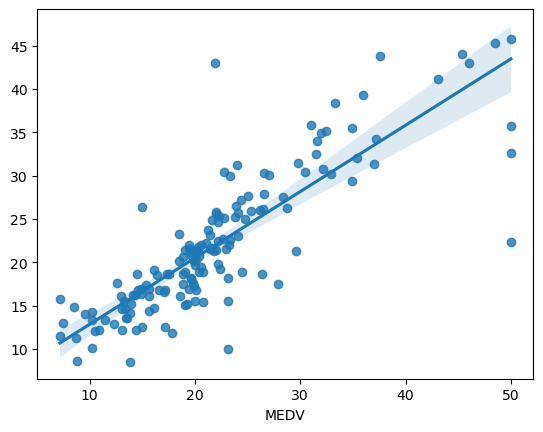

In [18]:
import seaborn as sns
y_pred = model.predict(X_test)
sns.regplot(y_test,y_pred)
plt.show()

In [19]:
mse_nn,mae_nn = model.evaluate(X_test,y_test)

print('Mean squared error is: ',mse_nn)
print('Mean absoulte error is: ',mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.5172 - mae: 3.4376 
Mean squared error is:  23.332210540771484
Mean absoulte error is:  3.0990660190582275
